# Heatmap

<b>Author</b>: Madeleine Ernst (maet@ssi.dk,[@madeleineernst](https://github.com/madeleineernst)) 

In this notebook we create a heatmap showing relative abundances of putative chemical classes that are differntially abundant across left and right armpit samples of all volunteers combined at all timepoints. Chemical classes are putative estimates retrieved through the [MolNetEnhancer](https://www.mdpi.com/2218-1989/9/7/144) workflow and based on similarities in MS2 fragmentation patterns. 

<b>Input files</b>

- Feature table and metadata can be downloaded from [MassIVE](ftp://massive.ucsd.edu/MSV000081379/)
- Putative chemical classes can be downloaded from the MolNetEnhancer networking job on GNPS: <br>
https://gnps.ucsd.edu/ProteoSAFe/status.jsp?task=d341e23d0aa8489d9776118c48db5a67 <br>
(download Network, unzip folder, go to output_network/ClassyFireResults_Network.txt)

load library

In [1]:
library("ComplexHeatmap")

Loading required package: grid

ComplexHeatmap version 2.8.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




load metadata

In [2]:
md <- read.table('Metadata_clothes_study.txt', sep = '\t', check.names=F, header = T, comment.char = '', skip = 1)

In [3]:
head(md)

,#SampleID,orig_name,primer_plate,well_id,BarcodeSequence,LinkerPrimerSequence,center_name,center_project_name,experiment_design_description,extraction_robot,⋯,,.1,.2,.3,.4,.5,.6,.7,.8,.9
,<chr>,<chr>,<int>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,Cl.Blank.1A1.empty,1A1,1,A1,NA,GTGTGYCAGCMGCCGCGGTAA,USCDMI,Clothes study,Clothes impact on skin microbiome/metabolome,HOWE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Cl.V1.1A2.Blank,1A2,1,A2,NA,GTGTGYCAGCMGCCGCGGTAA,USCDMI,Clothes study,Clothes impact on skin microbiome/metabolome,HOWE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,Cl.V1.1A3.RA,1A3,1,A3,NA,GTGTGYCAGCMGCCGCGGTAA,USCDMI,Clothes study,Clothes impact on skin microbiome/metabolome,HOWE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,Cl.V1.1A4.LA,1A4,1,A4,NA,GTGTGYCAGCMGCCGCGGTAA,USCDMI,Clothes study,Clothes impact on skin microbiome/metabolome,HOWE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,Cl.V1.1A5.C,1A5,1,A5,NA,GTGTGYCAGCMGCCGCGGTAA,USCDMI,Clothes study,Clothes impact on skin microbiome/metabolome,HOWE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,Cl.V1.1A6.UB,1A6,1,A6,NA,GTGTGYCAGCMGCCGCGGTAA,USCDMI,Clothes study,Clothes impact on skin microbiome/metabolome,HOWE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


load feature table

In [4]:
ft <- read.csv('20180104_features_MS2.csv', sep = ',', check.names = F)

In [5]:
head(ft)

,row ID,row m/z,row retention time,CI.V10.2E12.UB_GE12_01_37977.mzXML,CI.V1.1A2.Blank_GA2_01_37823.mzXML,CI.V1.2A2.Blank_GA2_01_37919.mzXML,CI.V1.1A7.LB_GA7_01_37828.mzXML,CI.V1.3A12.UB_GA12_01_38022.mzXML,CI.V1.3A8.Blank_GA8_01_38018.mzXML,CI.V1.3A11.C_GA11_01_38021.mzXML,⋯,Cl.V9.7E10.LA_GE10_01_38452.mzXML,Cl.V9.9G8.CLA_GG8_01_38680.mzXML,Cl.V9.9B7.LB_GB7_01_38617.mzXML,Cl.V9.6D11.C_GD11_01_38337.mzXML,Cl.V9.9B3.RA_GB3_01_38613.mzXML,Cl.V9.6D9.RA_GD9_01_38335.mzXML,Cl.V9.9B5.C_GB5_01_38615.mzXML,Cl.V9.9B4.LA_GB4_01_38614.mzXML,Cl.V9.6D12.UB_GD12_01_38338.mzXML,Cl.V9.9B6.UB_GB6_01_38616.mzXML
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,309.1310,4.578742,1138474.83,1350679.27,1663354.41,1841587.57,1949487.29,1865802.50,2322706.21,⋯,172359.84,40509.94,32600.430,134328.22,57743.27,177192.50,33423.05,55365.40,151893.85,33876.118
2,2,353.1574,4.593583,497808.39,395031.82,367164.07,348340.12,521272.83,395125.57,518559.54,⋯,495621.00,55686.40,28058.704,215996.21,85582.71,827209.90,38585.91,82453.62,164472.08,48714.038
3,3,311.0810,3.432998,210256.83,60586.74,43254.58,78756.81,45883.03,46132.82,45846.09,⋯,251282.49,162884.40,163283.208,190643.06,161425.01,210055.10,173695.81,166887.63,194880.15,157979.276
4,4,287.1488,4.582337,121685.32,244454.98,174670.13,399499.30,209844.03,192635.99,281543.01,⋯,34880.88,7537.60,6967.822,18044.72,17208.66,35511.96,7723.87,11029.29,19822.13,6731.214
5,5,113.0599,4.588744,126796.94,371932.47,252203.41,490816.54,229050.26,265218.24,267816.14,⋯,79238.33,14904.40,9153.320,33026.94,20474.60,104629.75,10799.78,17018.20,31673.02,12641.380
6,6,285.1314,3.028671,88310.82,293206.39,317457.66,290049.64,395533.63,346493.39,455962.94,⋯,88949.26,37876.86,60378.004,144662.88,57392.87,131429.12,63266.75,45327.63,136126.57,69658.646


rename feature table column names so that they match with metadata

In [6]:
colnames(ft) <- lapply(strsplit(colnames(ft),'_'), '[[', 1)
colnames(ft) <- gsub('CI','Cl',colnames(ft))
colnames(ft)[-which(colnames(ft) %in% md$`#SampleID`)]

[1] "row ID"             "row m/z"            "row retention time"

load chemical class information

In [7]:
cl <- read.table('ClassyFireResults_Network.txt', header = T, sep = '\t')

In [8]:
head(cl)

,cluster.index,CF_componentindex,CF_NrNodes,CF_kingdom,CF_kingdom_score,CF_superclass,CF_superclass_score,CF_class,CF_class_score,CF_subclass,CF_subclass_score,CF_Dparent,CF_Dparent_score,CF_MFramework,CF_MFramework_score
,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,270,S1,1,no matches,0,no matches,0.0000000,no matches,0.0000000,no matches,0.0000000,no matches,0.00000000,no matches,0.0000000
2,271,S2,1,no matches,0,no matches,0.0000000,no matches,0.0000000,no matches,0.0000000,no matches,0.00000000,no matches,0.0000000
3,272,S3,1,no matches,0,no matches,0.0000000,no matches,0.0000000,no matches,0.0000000,no matches,0.00000000,no matches,0.0000000
4,273,29,25,Organic compounds,1,Lipids and lipid-like molecules,0.5759206,Steroids and steroid derivatives,0.2733651,"Bile acids, alcohols and derivatives",0.1293651,Lineolic acids and derivatives,0.09333333,Aliphatic homopolycyclic compounds,0.3399048
5,255,29,25,Organic compounds,1,Lipids and lipid-like molecules,0.5759206,Steroids and steroid derivatives,0.2733651,"Bile acids, alcohols and derivatives",0.1293651,Lineolic acids and derivatives,0.09333333,Aliphatic homopolycyclic compounds,0.3399048
6,5674,29,25,Organic compounds,1,Lipids and lipid-like molecules,0.5759206,Steroids and steroid derivatives,0.2733651,"Bile acids, alcohols and derivatives",0.1293651,Lineolic acids and derivatives,0.09333333,Aliphatic homopolycyclic compounds,0.3399048


reformat feature table so that it is ready for downstream analysis

In [9]:
ft <- t(ft)
colnames(ft) <- ft[1,]
ft <- ft[-c(1,2,3),]

In [10]:
head(ft)

,1,2,3,4,5,6,7,8,9,10,⋯,5804,5805,5806,5807,5808,5809,5810,5811,5812,5813
Cl.V10.2E12.UB,1138475,497808.4,210256.83,121685.3,126796.9,88310.82,78059.69,90706.51,139948.1,458312.06,⋯,0,68.184,90.762,0.000,165.126,0.000,0.000,96.594,216.676,0.000
Cl.V1.1A2.Blank,1350679,395031.8,60586.74,244455.0,371932.5,293206.39,333194.66,402297.07,140084.1,23412.64,⋯,0,116.536,77.088,122.760,498.274,0.000,179.008,335.640,503.186,174.588
Cl.V1.2A2.Blank,1663354,367164.1,43254.58,174670.1,252203.4,317457.66,454744.71,188492.76,148437.5,73313.75,⋯,0,187.824,0.000,0.000,1029.132,0.000,186.450,175.708,372.656,82.270
Cl.V1.1A7.LB,1841588,348340.1,78756.81,399499.3,490816.5,290049.64,336609.12,584502.77,134868.0,23808.10,⋯,0,1809.034,213.332,643.540,23549.616,192.420,0.000,0.000,19749.712,251.696
Cl.V1.3A12.UB,1949487,521272.8,45883.03,209844.0,229050.3,395533.63,217912.19,126458.05,115758.9,349550.09,⋯,0,401.590,0.000,377.256,2254.768,965.812,120.036,882.650,162.292,278.018
Cl.V1.3A8.Blank,1865803,395125.6,46132.82,192636.0,265218.2,346493.39,518702.66,126268.73,123069.0,47934.27,⋯,0,143.208,91.488,171.240,137.232,120.414,207.052,482.496,421.514,85.590


check whether rownames in feature table correspond to sample names in metadata

In [11]:
md <- md[which(md$'#SampleID' %in% rownames(ft)),]
md <- md[match(rownames(ft),md$'#SampleID'),]
identical(as.character(md$'#SampleID'),as.character(rownames(ft)))

[1] TRUE

select only samples from left and right armpits respectively

In [12]:
l <- which(md$sample_site %in% c('Left armpit', 'Right armpit'))
md <- md[l,]
ft <- ft[l,]

check whether rownames in feature table still correspond to sample names in metadata

In [13]:
identical(as.character(md$'#SampleID'),as.character(rownames(ft)))

[1] TRUE

check how many samples there are in total from left and right armpits respectively

In [14]:
table(md$sample_site)


 Left armpit Right armpit 
         119          119 

## Find differentially abundant metabolite features across left and right armpits

select metadata column, across which differential abundance should be tested

In [15]:
catscont <- md$sample_site

scale feature table

In [16]:
fts <- scale(ft)

perform a Kruskal–Wallis test for one metabolite feature

In [17]:
kruskal.test(fts[,2] ~ as.factor(catscont))


	Kruskal-Wallis rank sum test

data:  fts[, 2] by as.factor(catscont)
Kruskal-Wallis chi-squared = 4.3434e-05, df = 1, p-value = 0.9947


perform a Kruskal-Wallis test across all features and adjust for multiple hypothesis testing using the false discovery rate (FDR) method

In [18]:
krusk <- function (x) {
  out <- tryCatch(unlist(kruskal.test(fts[,x] ~ as.factor(catscont))[c("p.value")]), error = function(e) return(NA))
  return(out)
}

In [19]:
res <- t(sapply(1:ncol(fts), krusk ))
res <- cbind(unlist(res[1,]),p.adjust(unlist(res[1,]), method = "fdr"))

In [20]:
rownames(res) <- colnames(fts)
res <- cbind(res,rownames(res))
colnames(res) <- c('p.value','p.value.corrected', 'cluster id')

show all significantly differentially abundant metabolite features

In [21]:
head(res[which(res[,2] <= 0.05),])

,p.value,p.value.corrected,cluster id
388,1.30044500899981e-05,0.000140805935373681,388
544,0.00528930904549445,0.044968233898285,544
594,0.0057060992749265,0.048302994922749,594
658,0.00295564086405189,0.0259640967098395,658
691,0.00227924474134034,0.0203746245917895,691
821,0.000192029175946292,0.001933093704526,821


write out differentially abundant features as table

In [22]:
sigres <- res[which(res[,2] <= 0.05),]

In [23]:
write.table(sigres,'Kruskal_significantfeatures.txt', row.names = F, quote = F, sep = '\t')

save significant feature id's in a vector

In [24]:
sigids <- as.vector(res[which(res[,2] <= 0.05),3])

In [25]:
length(sigids)

[1] 152

## Create heatmap of differentially abundant metabolite features across left and right armpits

select only features, which were significantly differentially abundnant across left and right armpits

In [26]:
fts <- fts[,which(colnames(fts) %in% sigids)]

In [27]:
head(fts)
dim(fts)

,388,544,594,658,691,821,822,918,941,944,⋯,5609,5628,5634,5635,5638,5641,5668,5712,5725,5739
Cl.V11.3F3.RA,-0.2495544,-0.3007473,-0.4957239,-0.2855613,-0.148792,-0.58141102,-0.1596536,-0.1608571,-0.20201602,-0.2029465,⋯,-0.3512186,-0.5654462,-0.12277661,-0.1227839,-0.7557996,-0.35359375,-0.33493676,-0.2661660,-0.5202949,-0.71032193
Cl.V10.3D9.RA,-0.3278642,-0.3058482,-0.4723357,0.1051639,-0.148792,-0.58141102,-0.8451370,-0.1608571,-0.20201602,-0.1998676,⋯,-0.6776061,-0.5579758,-0.05552286,-0.1339228,0.4868272,-0.27055706,1.36410129,-0.2991921,-0.4812529,-0.69921637
Cl.V1.3A9.RA,-0.8138697,-0.3195278,-0.2665026,0.9780695,-0.148792,0.29027953,0.6571625,-0.1608571,-0.20201602,-0.2075552,⋯,-0.4945315,-0.6878880,1.42070882,1.6690732,0.6460898,0.04362123,1.12878338,-0.2991921,-0.6141586,-0.33227465
Cl.V1.3A10.LA,0.1738009,-0.3139451,-0.2623728,-0.2306412,-0.148792,0.77890105,-0.1349591,4.1264996,0.08418565,-0.2075552,⋯,-0.5836184,-0.4171631,0.43468329,-0.1234270,-0.7557996,0.02772715,0.15202509,-0.2991921,-0.3225409,0.06636956
Cl.V1.2A3.RA,-0.6483889,-0.2272825,1.1964990,-0.3730744,-0.148792,0.11131513,-0.4454225,-0.1608571,-0.20201602,-0.2075552,⋯,-0.3944526,-0.6903316,-0.18734440,-0.1349180,-0.7557996,-0.24580574,0.08061806,-0.2991921,-0.5717439,-0.45632387
Cl.V1.1A3.RA,-0.3265230,1.0354189,1.2228973,-0.3995058,-0.148792,-0.05703315,0.7946307,-0.1608571,-0.20201602,-0.2075552,⋯,-0.5109005,-0.2027348,-0.14315676,-0.1891579,-0.7557996,-0.15792220,-0.33493676,-0.2991921,-0.3409560,-0.43897123


[1] 238 152

select putative chemical classes of features that were differentially abundant

In [28]:
cl <- cl[which(cl$cluster.index %in% colnames(fts)),]

In [29]:
dim(cl)

[1] 152  15

In [30]:
unique(cl$CF_class)

[1] "Prenol lipids"                    "Glycerophospholipids"            
 [3] "Steroids and steroid derivatives" "no matches"                      
 [5] "Fatty Acyls"                      "Purine nucleotides"              
 [7] "Carboxylic acids and derivatives" "Depsides and depsidones"         
 [9] "Organonitrogen compounds"         "Indoles and derivatives"

In [31]:
unique(md$sample_site)

[1] "Right armpit" "Left armpit"

remove features with no putative chemical class annotation

In [32]:
cl_un <- cl[-which(cl$CF_class == 'no matches'),]

In [33]:
fts_un <- fts[,which(colnames(fts) %in% cl_un$cluster.index)]

In [34]:
dim(cl_un)
dim(fts_un)

[1] 50 15

[1] 238  50

create color legends for heatmap

In [35]:
col <- list(Class = c("Prenol lipids" = "#3889A0", "Glycerophospholipids" = "#F2AD00", "Steroids and steroid derivatives" = "#FF8300", 
                              "no matches" = "#1B9E77",'Fatty Acyls' = "#046C9A", 'Purine nucleotides' = "#0B775E", 'Carboxylic acids and derivatives' = "#35274A",
                             'Depsides and depsidones' = "#F2300F", 'Organonitrogen compounds' = '#ff77aa', 'Indoles and derivatives'= '#cc8899')
            ,Site =  c('Right armpit' = '#3EB489', 'Left armpit' = '#A020F0')
           )

In [36]:
site_annot <- HeatmapAnnotation(Site = md$sample_site, which = "row", width = unit(1.5, "cm")
                                 ,col = col, annotation_legend_param = list(title = "Site"))

In [37]:
chem_annot <- HeatmapAnnotation(Class = cl_un$CF_class[match(colnames(fts_un),cl_un$cluster.index)]
                                ,col = col, annotation_legend_param = list(title = "Chemical class"))

check whether chemical class matching to features is correct

In [38]:
identical(as.character(cl_un$cluster.index[match(colnames(fts_un),cl_un$cluster.index)]), colnames(fts_un))

[1] TRUE

create heatmap showing differentially abundant metabolite features across left and right armpits and their respective putative chemical classes 

The automatically generated colors map from the minus and plus 99^th of
the absolute values in the matrix. There are outliers in the matrix
whose patterns might be hidden by this color mapping. You can manually
set the color to `col` argument.

Use `suppressMessages()` to turn off this message.



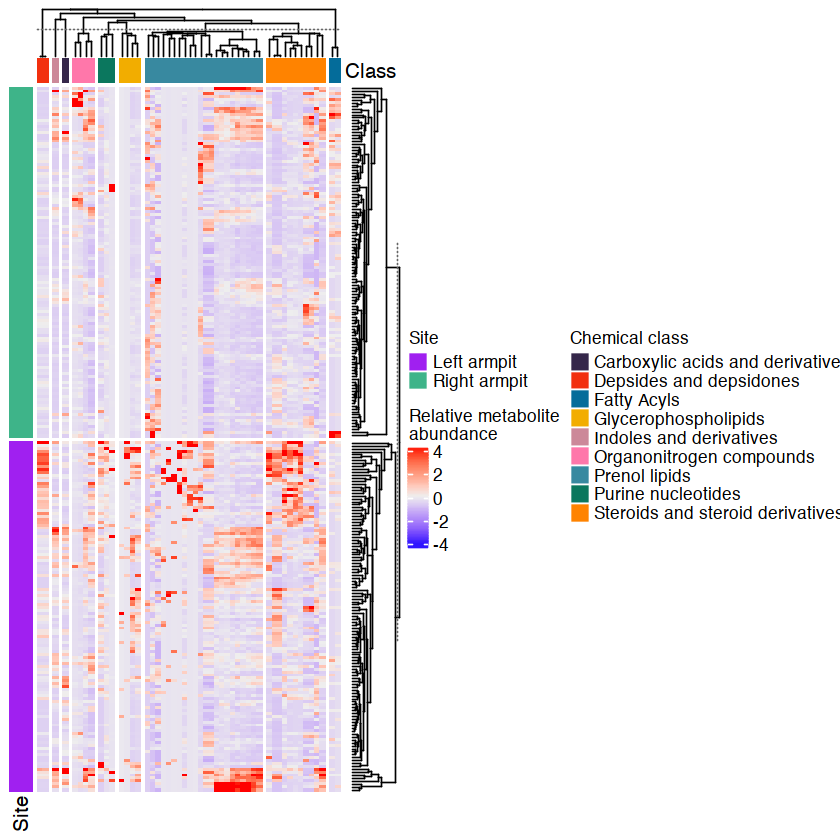

In [39]:
Heatmap(fts_un,
       name = paste("Relative metabolite","abundance", sep = "\n"), 
       clustering_distance_rows = 'euclidean',
       clustering_method_rows = 'complete',
       top_annotation = chem_annot,
       left_annotation = site_annot,
       split = md$sample_site,
       row_labels = rep('',nrow(fts_un)),
       column_labels = rep('',ncol(fts_un)),
       column_split = cl_un$CF_class[match(colnames(fts_un),cl_un$cluster.index)],
       row_dend_side = "right",
       cluster_row_slices = TRUE,
       cluster_columns = TRUE,
       column_title=NULL,
       row_title=NULL
       ) 

save figure as pdf

In [40]:
pdf("AnnotatedHeatmap_Classes_Annotated.pdf", height = 10, width = 11)
Heatmap(fts_un,
       name = paste("Relative metabolite","abundance", sep = "\n"), 
       clustering_distance_rows = 'euclidean',
       clustering_method_rows = 'complete',
       top_annotation = chem_annot,
       left_annotation = site_annot,
       split = md$sample_site,
       row_labels = rep('',nrow(fts_un)),
       column_labels = rep('',ncol(fts_un)),
       column_split = cl_un$CF_class[match(colnames(fts_un),cl_un$cluster.index)],
       row_dend_side = "right",
       cluster_row_slices = TRUE,
       cluster_columns = TRUE,
       column_title=NULL,
       row_title=NULL
       ) 
dev.off()

The automatically generated colors map from the minus and plus 99^th of
the absolute values in the matrix. There are outliers in the matrix
whose patterns might be hidden by this color mapping. You can manually
set the color to `col` argument.

Use `suppressMessages()` to turn off this message.



pdf 
  2